# Final Year Major Project

Stock Price Prediction

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future.


## Use 

In the following cells we download and save the data set of the company we want.

   **Step 1 :** Define a function to get historical data Alphavantage

In [24]:
import pandas as pd
import datetime as dt
from pandas_datareader import data
import urllib.request, json 
import os

2. Download data
You present code for using data from,

Alpha Vantage. Before you start, however, you will first need an API key, which you can obtain for free here. After that, you can assigned that key to the api_key variable.
Stock prices come in several different flavours. They are,

Open: Opening stock price of the day
Close: Closing stock price of the day
High: Highest stock price of the data
Low: Lowest stock price of the day
Getting Data from Alphavantage
You will first load in the data from Alpha Vantage. Since you're going to make use of the American Airlines Stock market prices to make your predictions, you set the ticker to "AAL". Additionally, you also define a url_string, which will return a JSON file with all the stock market data for American Airlines within last 20 years, and a file_to_save, which will be the file to which you save the data. You'll use the ticker variable that you defined beforehand to help name this file.

Next, you're going to specify a condition: if you haven't already saved data, you will go ahead and grab the data from the URL that you set in url_string; You'll store the date, low, high, volume, close, open values to a pandas DataFrame df and you'll save it to file_to_save. However, if the data is already there, you'll just load it from the CSV.

In [25]:
data_source = 'alphavantage'

    # ====================== Loading Data from Alpha Vantage ==================================

api_key = 'TFT45YBBY0XZUTOL'

# American Airlines stock market prices
ticker = "MSFT" 

# JSON file with all the stock market data for AAL within the last 20 years
url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)

# Save data to this file
file_to_save = 'stock_market_data-%s.csv'%ticker

# If you haven't already saved data,
# Go ahead and grab the data from the url
# And store date, low, high, volume, close, open values to a Pandas dataframe
if not os.path.exists(file_to_save):
    with urllib.request.urlopen(url_string) as url:
        data = json.loads(url.read().decode())
        # extract stock market data
        data = data['Time Series (Daily)']
        df = pd.DataFrame(columns=['Date','Open','High','Low','Close','Volume'])
        for k,v in data.items():
            date = dt.datetime.strptime(k, '%Y-%m-%d')
            data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                        float(v['4. close']),float(v['1. open']),float(v['5. volume'])]
            df.loc[-1,:] = data_row
            df.index = df.index + 1
    print('Data saved to : %s'%file_to_save) 
    df = df.sort_values('Date')
    df.index = df['Date']
    del df['Date']
    df.to_csv(file_to_save)

# If the data is already there, just load it from the CSV
else:
    print('File already exists. Loading data from CSV')
    df = pd.read_csv(file_to_save,index_col="Date",parse_dates=True)



File already exists. Loading data from CSV


## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [26]:
import pandas as pd
import numpy as np
print(df.head(10))
print("--------------------------------------------------")
print(df.tail(10))

              Open    High     Low   Close      Volume
Date                                                  
1998-01-02  129.50  131.50  131.13  129.63   4968500.0
1998-01-05  127.87  133.63  130.38  131.25  10047200.0
1998-01-06  129.25  133.00  131.13  129.75   8479300.0
1998-01-07  127.50  131.19  129.56  129.88   7686600.0
1998-01-08  127.50  132.13  130.50  128.63   9702400.0
1998-01-09  125.87  131.50  127.00  130.06  10941800.0
1998-01-12  124.37  130.00  129.50  124.62   9799200.0
1998-01-13  128.13  132.25  132.13  129.50   8368200.0
1998-01-14  129.25  132.50  131.13  132.13   6846800.0
1998-01-15  129.88  133.00  132.31  130.38   6327800.0
--------------------------------------------------
                Open    High     Low   Close      Volume
Date                                                    
2019-04-08  118.6400  120.02  119.93  119.81  15116186.0
2019-04-09  118.5800  119.54  119.28  118.63  17611981.0
2019-04-10  119.5400  120.35  120.19  119.76  16477169.0
2019

**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [4]:
from Include import preprocess_data as ppd
stocks = ppd.remove_data(df)

#Print the dataframe head and tail
print(stocks.head())
print("--------------------------------------------------")
print(stocks.tail())

   Item      Open   Close      Volume
0     0  122.5700  122.62  14823625.0
1     1  121.3018  122.19  27990998.0
2     2  120.5400  121.24  19300938.0
3     3  120.1000  121.64  14071787.0
4     4  120.5700  120.94  15792572.0
--------------------------------------------------
      Item    Open   Close      Volume
5354  5354  127.50  128.63   9702400.0
5355  5355  127.50  129.88   7686600.0
5356  5356  129.25  129.75   8479300.0
5357  5357  127.87  131.25  10047200.0
5358  5358  129.50  129.63   4968500.0


**Step 2: ** Visualise raw data.

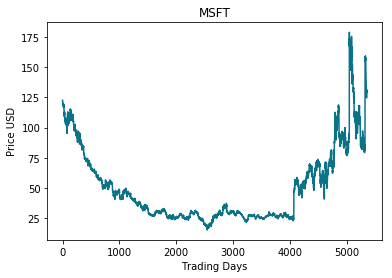

In [6]:
from Include import visualize
visualize.plot_basic(stocks,ticker)

**Step 3 :** Normalise the data using minmaxscaler function

In [7]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head(10))

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.669443  0.656040  0.019342
1     1  0.661560  0.653414  0.041751
2     2  0.656825  0.647612  0.026962
3     3  0.654090  0.650055  0.018063
4     4  0.657011  0.645780  0.020991
5     5  0.655768  0.643948  0.027718
6     6  0.652971  0.643337  0.018297
7     7  0.650609  0.638573  0.022157
8     8  0.644642  0.631672  0.024088
9     9  0.645015  0.638879  0.019840


Open   --- mean : 0.213661154122   	 Std:  0.184139922502   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.211616618498   	 Std:  0.183773373128   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.0745209105311   	 Std:  0.0489334348103   	 Max:  1.0   	 Min:  0.0


**Step 4 :** Visualize the data again

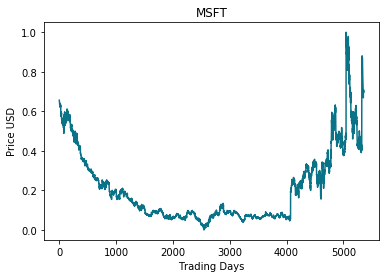

In [8]:
visualize.plot_basic(stocks,ticker)

**Step 5:** Log the normalised data for future resuablilty

In [9]:
file_to_save_preprocessed = 'stock_market_data-%s_preprocessed.csv'%ticker
stocks.to_csv(file_to_save_preprocessed,index= False)

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [10]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

from Include import visualize as vs
from Include import stock_data as sd
from Include import LinearRegressionModel

stocks = pd.read_csv(file_to_save_preprocessed)
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.669443,0.656040,0.019342
1,1,0.661560,0.653414,0.041751
2,2,0.656825,0.647612,0.026962
3,3,0.654090,0.650055,0.018063
4,4,0.657011,0.645780,0.020991


**Step 2:** Split data into train and test pair

In [11]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)


X_train (3671, 1)
y_train (3671, 1)
X_test (1688, 1)
y_test (1688, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [12]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [13]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)
predictions[:10]

array([-0.0398898 , -0.0399992 , -0.0401086 , -0.04021799, -0.04032739,
       -0.04043678, -0.04054618, -0.04065557, -0.04076497, -0.04087437])

**Step 5:** Plot the predicted values against actual

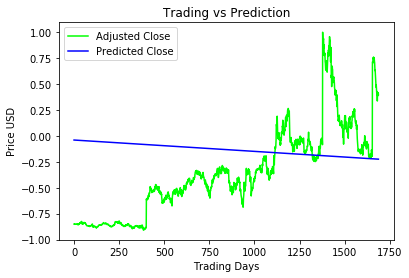

In [14]:
vs.plot_prediction(y_test,predictions)         

**Step 6:** measure accuracy of the prediction

In [15]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.5563 MSE (0.7459 RMSE)
Test Score: 0.26617422 MSE (0.51592075 RMSE)





## Long-Sort Term Memory Model



### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [16]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import time #helper libraries

from Include import visualize as vs
from Include import stock_data as sd
from Include import LinearRegressionModel
from Include import lstm
stocks = pd.read_csv(file_to_save_preprocessed)
stocks_data = stocks.drop(['Item'], axis =1)
display(stocks_data.head())

Using TensorFlow backend.


,Open,Close,Volume
0,0.669443,0.656040,0.019342
1,0.661560,0.653414,0.041751
2,0.656825,0.647612,0.026962
3,0.654090,0.650055,0.018063
4,0.657011,0.645780,0.020991


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [18]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data,1)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (4807, 50, 3)
y_train (4807,)
x_test (450, 50, 3)
y_test (450,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [19]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.16766786575317383


**Step 4:** Train the model

In [20]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    verbose=1,
    validation_split=0.05)

Train on 4566 samples, validate on 241 samples
Epoch 1/1
4566/4566 [==============================] - 18s 4ms/step - loss: 0.0013 - val_loss: 0.0020


**Step 5:** make prediction using test data

In [21]:
predictions = model.predict(X_test)
model.save('lstm_model.h5')

**Step 6:** Plot the results

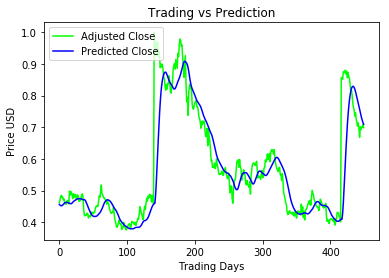

In [22]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [27]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))


testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00025197 MSE (0.01587361 RMSE)
Test Score: 0.00736598 MSE (0.08582531 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [86]:
# Set up hyperparameters
batch_size = 128

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()

#final_model.compile(loss='mean_squared_error', optimizer='adam')

model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.015590190887451172


**Step 2: ** Train improved LSTM model

In [56]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_split=0.01
         )

Train on 716 samples, validate on 8 samples
Epoch 1/30
716/716 [==============================] - 3s 3ms/step - loss: 0.1505 - val_loss: 0.0250
Epoch 2/30
716/716 [==============================] - 2s 2ms/step - loss: 0.0266 - val_loss: 3.6007e-04
Epoch 3/30
716/716 [==============================] - 2s 2ms/step - loss: 0.0192 - val_loss: 9.7612e-05
Epoch 4/30
716/716 [==============================] - ETA: 0s - loss: 0.006 - 1s 2ms/step - loss: 0.0069 - val_loss: 0.0093
Epoch 5/30
716/716 [==============================] - 2s 2ms/step - loss: 0.0079 - val_loss: 0.0029
Epoch 6/30
716/716 [==============================] - 2s 2ms/step - loss: 0.0055 - val_loss: 7.2052e-04
Epoch 7/30
716/716 [==============================] - 2s 2ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 8/30
716/716 [==============================] - 2s 2ms/step - loss: 0.0048 - val_loss: 0.0029
Epoch 9/30
716/716 [==============================] - 2s 2ms/step - loss: 0.0045 - val_loss: 6.5802e-04
Epoch 10/30
716/

**Step 3:** Make prediction on improved LSTM model

In [57]:
# Generate predictions 
model.save('lstm_model_improved.h5')
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

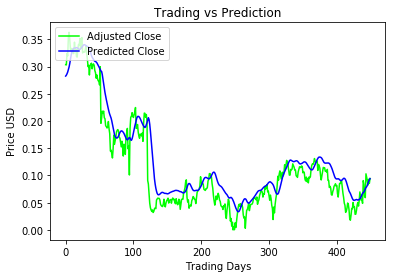

In [58]:
vs.plot_lstm_prediction(y_test,predictions)


**Step 5:** Get the test score

In [59]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))
#print("%s: %.2f%%" % (model.metrics_names[1], testScore[1]*100))

Train Score: 0.00143191 MSE (0.03784054 RMSE)
Test Score: 0.00099017 MSE (0.03146702 RMSE)


In [60]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.000990 - RMSE * Adjusted Close Range


In [61]:
# load model from single file
from keras.models import load_model
model = load_model('lstm_model_improved.h5')
# make predictions
yhat = model.predict(X_test[-1:], verbose=1)
predict_nextDay=yhat.tolist()
last_day=y_test[-1:].tolist()

print(predict_nextDay)

1/1 [==============================] - 0s 328ms/step
[[0.09404148161411285]]


In [62]:
print(last_day)

[0.09448058221163136]


In [63]:
if(predict_nextDay[0] > last_day):
    print('Either sell it or wait. We\'ll assert you to WAIT. ')
else:
    print('If you buy it, it will be beneficial for you.')

If you buy it, it will be beneficial for you.
